In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('F:\jupyter\\titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [3]:

titanic=df[['Age','Pclass','Fare','Survived']]


In [4]:
##we have total 20% null values in the age columns and some small amount in Fare columns now we
#replace them is a mean or median
titanic.isnull().mean()
#df.isnull().sum() it show the total number of null values

Age         0.205742
Pclass      0.000000
Fare        0.002392
Survived    0.000000
dtype: float64

In [5]:
mean=titanic['Age'].mean()
mean

30.272590361445783

In [6]:
median=titanic['Age'].median()
median

27.0

In [7]:
mean=titanic['Fare'].mean()
mean

35.6271884892086

In [8]:
median=titanic['Fare'].median()
median

14.4542

In [9]:
titanic['Mean_Age']=titanic.Age.fillna(mean)

<ipython-input-9-fa1ce1aaeff7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Mean_Age']=titanic.Age.fillna(mean)


In [10]:
titanic['Median_age']=titanic.Age.fillna(median)

<ipython-input-10-bc046bb644a6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Median_age']=titanic.Age.fillna(median)


In [11]:
titanic['Mean_Fare']=titanic.Fare.fillna(mean)

<ipython-input-11-95892f0c4414>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Mean_Fare']=titanic.Fare.fillna(mean)


In [12]:
titanic['Median_Fare']=titanic.Fare.fillna(median)

<ipython-input-12-9a3f78441629>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['Median_Fare']=titanic.Fare.fillna(median)


# mean and median
The mean and median imputation can affect the data distribution for the columns containing the missing values. Especially, the variance of the column is decreased by

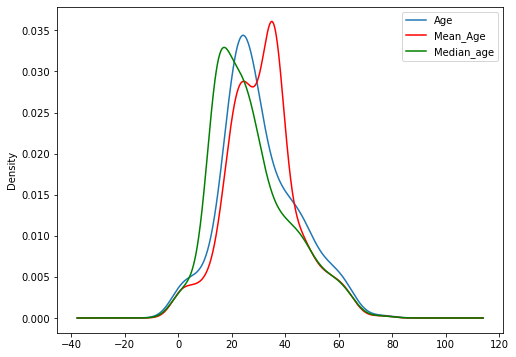

In [13]:
plt.rcParams['figure.figsize']=[8,6]
fig=plt.figure()
ax=fig.add_subplot(111)
titanic['Age'].plot(kind='kde',ax=ax)
titanic['Mean_Age'].plot(kind='kde',ax=ax,color='red')
titanic['Median_age'].plot(kind='kde',ax=ax,color='green')
lines,labels=ax.get_legend_handles_labels()
ax.legend(lines,labels,loc='best')


#  End of Distribution Imputation
The mean and median imputation and the CCA are not good techniques for missing value imputations in case the data is not randomly missing. For randomly missing data, the most commonly used techniques are end of distribution/end of tail imputation.

(array([ 8.,  3.,  0.,  4.,  1.,  4.,  2.,  3.,  3.,  4.,  2., 20.,  7.,
        25., 17., 28., 11., 25.,  8., 25., 12.,  8.,  7., 10.,  6.,  7.,
        11.,  5.,  5.,  9.,  8.,  5.,  8.,  1.,  3.,  2.,  6.,  3.,  2.,
         4.,  3.,  2.,  3.,  0.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 0.17  ,  1.6866,  3.2032,  4.7198,  6.2364,  7.753 ,  9.2696,
        10.7862, 12.3028, 13.8194, 15.336 , 16.8526, 18.3692, 19.8858,
        21.4024, 22.919 , 24.4356, 25.9522, 27.4688, 28.9854, 30.502 ,
        32.0186, 33.5352, 35.0518, 36.5684, 38.085 , 39.6016, 41.1182,
        42.6348, 44.1514, 45.668 , 47.1846, 48.7012, 50.2178, 51.7344,
        53.251 , 54.7676, 56.2842, 57.8008, 59.3174, 60.834 , 62.3506,
        63.8672, 65.3838, 66.9004, 68.417 , 69.9336, 71.4502, 72.9668,
        74.4834, 76.    ]),
 <BarContainer object of 50 artists>)

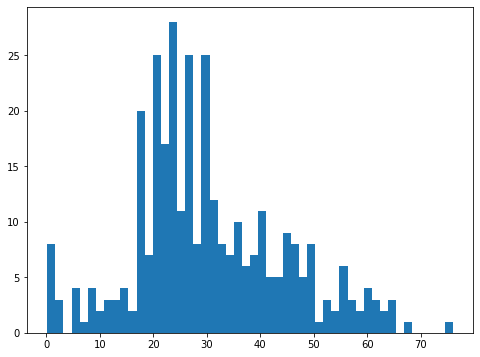

In [14]:
#it's normally distributed
plt.hist(titanic.Age,bins=50)


In [15]:
mean = titanic['Age'].mean()
mean

30.272590361445783

In [16]:
std=titanic['Age'].std()

In [17]:
extreme = (mean + (3*std))
extreme

72.81621806831905

In [18]:
titanic['end_val']=titanic.Age.fillna(extreme)

<ipython-input-18-f337cfd66cf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic['end_val']=titanic.Age.fillna(extreme)


In [19]:
titanic.head(20)

,Age,Pclass,Fare,Survived,Mean_Age,Median_age,Mean_Fare,Median_Fare,end_val
0,34.5,3,7.8292,0,34.500000,34.5000,7.8292,7.8292,34.500000
1,47.0,3,7.0000,1,47.000000,47.0000,7.0000,7.0000,47.000000
2,62.0,2,9.6875,0,62.000000,62.0000,9.6875,9.6875,62.000000
3,27.0,3,8.6625,0,27.000000,27.0000,8.6625,8.6625,27.000000
4,22.0,3,12.2875,1,22.000000,22.0000,12.2875,12.2875,22.000000
5,14.0,3,9.2250,0,14.000000,14.0000,9.2250,9.2250,14.000000
6,30.0,3,7.6292,1,30.000000,30.0000,7.6292,7.6292,30.000000
7,26.0,2,29.0000,0,26.000000,26.0000,29.0000,29.0000,26.000000
8,18.0,3,7.2292,1,18.000000,18.0000,7.2292,7.2292,18.000000
9,21.0,3,24.1500,0,21.000000,21.0000,24.1500,24.1500,21.000000


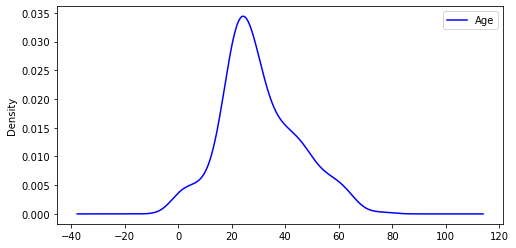

In [20]:
plt.figure(figsize=(8,4))
titanic.Age.plot(kind='kde',color='b')
plt.legend()

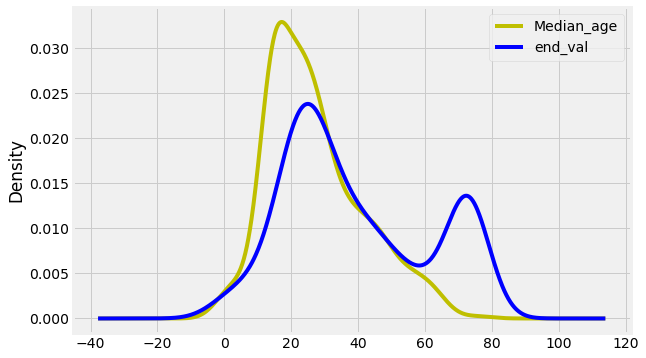

In [21]:
plt.figure(figsize=(10,6))
plt.style.use('fivethirtyeight')
titanic['Median_age'].plot(kind='kde',color='y')
titanic['end_val'].plot(kind='kde',color='b')

plt.legend()

C:\Users\Muhammad junaid\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='end_val'>

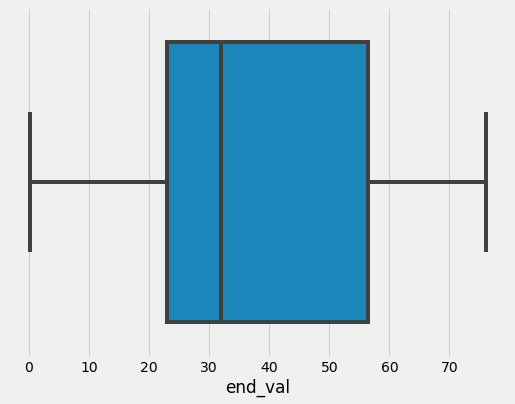

In [22]:
sns.boxplot(titanic['end_val'])

#  Handling Missing Categorical Data :
Frequent Category Imputation One of the most common ways of handling missing values in a categorical column is to replace the missing values with the most frequently occurring values, i.e., the mode of the column.

In [23]:
plt.rcParams['figure.figsize']=[8,6]
sns.set_style('darkgrid')
titanic_data=sns.load_dataset('titanic')
titanic_data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [24]:
titanic_data=titanic_data[['age','embark_town']]

In [25]:
titanic_data.isnull().sum()

age            177
embark_town      2
dtype: int64

Text(0, 0.5, 'number of passengers')

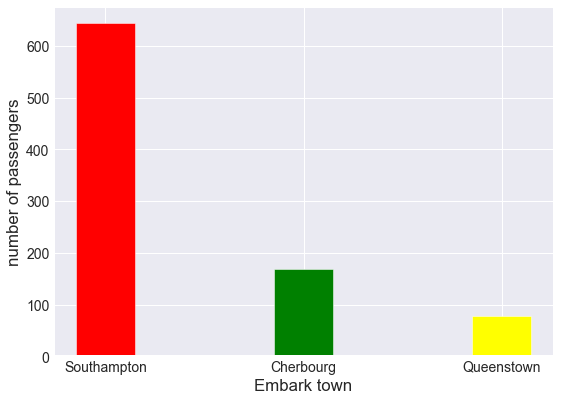

In [26]:
plt.bar(list(titanic_data['embark_town'].value_counts().keys()),
        list(titanic_data['embark_town'].value_counts()),color=['red','green','yellow'],width=0.3)
plt.style.use('fivethirtyeight')
plt.xlabel('Embark town')
plt.ylabel('number of passengers')

In [27]:
#yes southampton is a mode of the given data
titanic_data.embark_town.mode()

0    Southampton
dtype: object

In [28]:
titanic_data['embark_town'].fillna('Southampton',inplace=True)

In [29]:
titanic[titanic_data['age'].isna()]

<ipython-input-29-fd6451235c71>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  titanic[titanic_data['age'].isna()]


,Age,Pclass,Fare,Survived,Mean_Age,Median_age,Mean_Fare,Median_Fare,end_val
5,14.0,3,9.2250,0,14.000000,14.0000,9.2250,9.2250,14.000000
17,21.0,3,7.2250,0,21.000000,21.0000,7.2250,7.2250,21.000000
19,45.0,3,7.2250,1,45.000000,45.0000,7.2250,7.2250,45.000000
26,22.0,1,61.9792,1,22.000000,22.0000,61.9792,61.9792,22.000000
28,41.0,1,30.5000,0,41.000000,41.0000,30.5000,30.5000,41.000000
...,...,...,...,...,...,...,...,...,...
409,3.0,3,13.7750,1,3.000000,3.0000,13.7750,13.7750,3.000000
410,NaN,3,7.7500,1,35.627188,14.4542,7.7500,7.7500,72.816218
411,37.0,1,90.0000,1,37.000000,37.0000,90.0000,90.0000,37.000000
413,NaN,3,8.0500,0,35.627188,14.4542,8.0500,8.0500,72.816218


In [30]:
#it will only take the nan values 
titanic[titanic['Age'].isnull()]


,Age,Pclass,Fare,Survived,Mean_Age,Median_age,Mean_Fare,Median_Fare,end_val
10,NaN,3,7.8958,0,35.627188,14.4542,7.8958,7.8958,72.816218
22,NaN,1,31.6833,1,35.627188,14.4542,31.6833,31.6833,72.816218
29,NaN,3,21.6792,0,35.627188,14.4542,21.6792,21.6792,72.816218
33,NaN,3,23.4500,1,35.627188,14.4542,23.4500,23.4500,72.816218
36,NaN,3,8.0500,1,35.627188,14.4542,8.0500,8.0500,72.816218
...,...,...,...,...,...,...,...,...,...
408,NaN,3,7.7208,1,35.627188,14.4542,7.7208,7.7208,72.816218
410,NaN,3,7.7500,1,35.627188,14.4542,7.7500,7.7500,72.816218
413,NaN,3,8.0500,0,35.627188,14.4542,8.0500,8.0500,72.816218
416,NaN,3,8.0500,0,35.627188,14.4542,8.0500,8.0500,72.816218


In [31]:
titanic.Age.mode()

0    21.0
1    24.0
dtype: float64

In [32]:
titanic['Age'].fillna(24,inplace=True)

C:\Users\Muhammad junaid\anaconda3\lib\site-packages\pandas\core\series.py:4517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [33]:
#no null values after putting the mode of the age columns
titanic[titanic['Age'].isnull()]

,Age,Pclass,Fare,Survived,Mean_Age,Median_age,Mean_Fare,Median_Fare,end_val


0.0